# Loan Prediction

### Importing libraries

In [95]:
import pandas as pd
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
import matplotlib as plt
import pickle
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import seaborn as sns  

### Read train file as pandas dataframe


In [53]:
train = pd.read_csv("train.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Data Cleaning

In [54]:
train.drop("Loan_ID", axis = 1, inplace = True) #drop Loan_ID

null_cat_columns=["Gender","Married","Dependents","Self_Employed","Credit_History"]
for i in null_cat_columns:
    train[i].fillna(train[i].mode()[0],inplace=True)
    
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mean(),inplace=True)
train["LoanAmount"].fillna(train["LoanAmount"].mean(),inplace=True)

In [55]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [56]:
train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### EDA

In [60]:
# Basic EDA done using Tablue

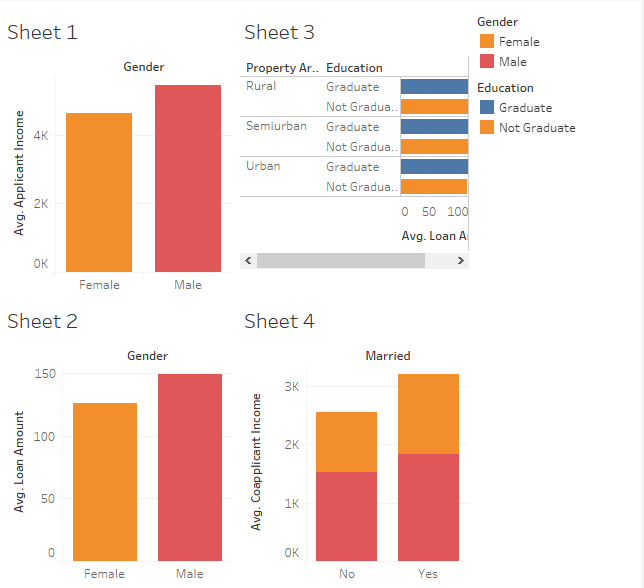

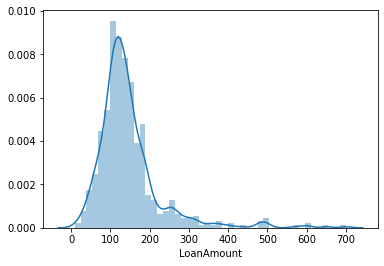

In [63]:
sns.distplot(train.LoanAmount)

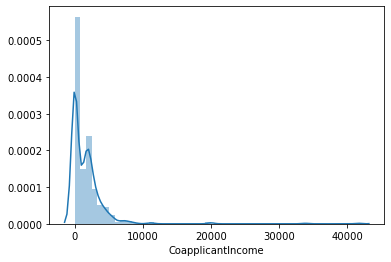

In [65]:
sns.distplot(train.CoapplicantIncome)

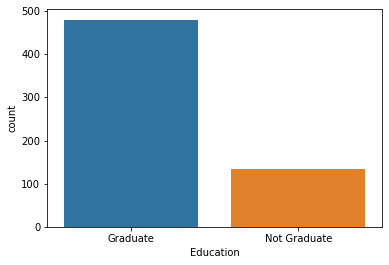

In [66]:
sns.countplot(train.Education)

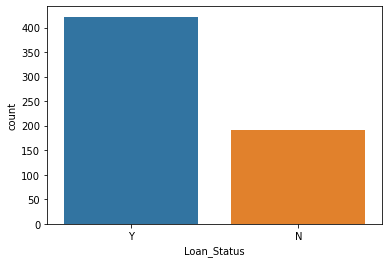

In [69]:
sns.countplot(train.Loan_Status)

### Label Enconding

In [123]:
df=train.copy()
df.Gender.replace({"Male":0,"Female":1},inplace=True)
df.Married.replace({"No":0,"Yes":1},inplace=True)
df.Dependents.replace({"0":0,"1":1,"2":2,"3+":3},inplace=True)
df.Education.replace({"Graduate":1,"Not Graduate":0},inplace=True)
df.Self_Employed.replace({"Yes":1,"No":0},inplace=True)
df.Property_Area.replace({"Urban":2,"Rural":0,"Semiurban":1},inplace=True)
df.Loan_Status.replace({"Y":1,"N":0},inplace=True)

In [124]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [125]:
train_encoded=df.copy()
train_encoded

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,0,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


In [126]:
features = train_encoded.drop("Loan_Status", axis = 1)
labels = train_encoded["Loan_Status"]

In [127]:
features.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2


In [128]:
labels.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [129]:
labels.replace("N", "0", inplace = True)
labels.replace("Y", "1", inplace = True)
labels = labels.astype(int)

### Models Building

In [130]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, stratify = labels)

In [131]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
17,1,0,0,1,0,3510,0.0,76.000000,360.0,0.0,2
605,0,1,0,0,0,2400,3800.0,146.412162,180.0,1.0,2
150,0,0,0,1,0,6277,0.0,118.000000,360.0,0.0,0
8,0,1,2,1,0,4006,1526.0,168.000000,360.0,1.0,2
133,0,1,0,1,1,3459,0.0,25.000000,120.0,1.0,1


#### Random Forest

In [132]:
rf = RandomForestClassifier() # testing for RandomForestClassifier
rf.fit(X_train, y_train)
Pred_RF = rf.predict(X_test)
accuracy_score(Pred_RF, y_test)

0.7727272727272727

#### Logistic Regression

In [133]:
LR = LogisticRegression() # tesing for LogisticRegression
LR.fit(X_train, y_train)
Pred_LR = LR.predict(X_test)
accuracy_score(Pred_LR, y_test)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7987012987012987

#### KNN

In [134]:
KNN = KNeighborsClassifier(16) # KNN, tested from 1 to 200, the best result is 16
KNN.fit(X_train, y_train)
Pred_KNN = KNN.predict(X_test)
accuracy_score(Pred_KNN, y_test)

0.6558441558441559

In [135]:
def plot_confusion_metrix(y_true, y_pred,classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    """
    Objective
    ----------
    plot confussion matrix, classification report and accuracy score
    
    parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.

    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    classes : list
        List of labels to index the matrix
        
    title : title for matrix
    
    cmap : colormap for matrix 
    
    returns 
    ----------
   all accruacy matrix 
    """
    
    
    cm = confusion_matrix(y_true,y_pred)
    
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, Without Normalisation")

    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=35)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # plt.tight_layout()
    
    plt.show()
    
    print("-----------------------------------------------------")
    print('Classification report')
    print(classification_report(y_true,y_pred))
    
    print("-----------------------------------------------------")
    acc= accuracy_score(y_true,y_pred)
    print("Accuracy of the model: ", acc)

Confusion Matrix, Without Normalisation


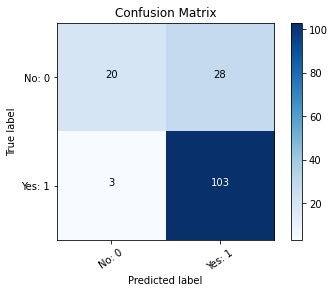

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.87      0.42      0.56        48
           1       0.79      0.97      0.87       106

    accuracy                           0.80       154
   macro avg       0.83      0.69      0.72       154
weighted avg       0.81      0.80      0.77       154

-----------------------------------------------------
Accuracy of the model:  0.7987012987012987


In [136]:
plot_confusion_metrix(y_test, Pred_LR,classes=["No: 0","Yes: 1"])

In [138]:
pickle.dump(LR,open("LR.pkl","wb"))
model=pickle.load(open("LR.pkl","rb"))

In [155]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
5,0,1,2,1,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,0,1,0,0,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,0,1,3,1,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,0,1,2,1,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,0,1,1,1,0,12841,10968.0,349.000000,360.0,1.0,1,0


In [159]:
df.iloc[7].tolist()

[0.0, 1.0, 3.0, 1.0, 0.0, 3036.0, 2504.0, 158.0, 360.0, 0.0, 1.0, 0.0]

In [160]:
model.predict([[0.0, 1.0, 3.0, 1.0, 0.0, 3036.0, 2504.0, 158.0, 360.0, 0.0, 1.0]])

array([0])